In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/vimu/Documents/Data Science/SDS/Github/TimeSeriesAnalysis/Data/Energy_consumption.csv',index_col= "Timestamp",parse_dates=True)

In [3]:
df.columns

Index(['Temperature', 'Humidity', 'SquareFootage', 'Occupancy', 'HVACUsage',
       'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday',
       'EnergyConsumption'],
      dtype='object')

In [4]:
columns_to_remove = [
    'Humidity', 'SquareFootage', 
    'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday'
]

df_cleaned = df.drop(columns=columns_to_remove, errors='ignore')

In [5]:
df_cleaned.columns

Index(['Temperature', 'Occupancy', 'EnergyConsumption'], dtype='object')

In [6]:
for lag in range(1, 8):  # 7 lags
    df_cleaned[f'lag_{lag}'] = df_cleaned['EnergyConsumption'].shift(lag)

# Drop rows with NaN introduced by shift
df_cleaned.dropna(inplace=True)

In [7]:
df_cleaned.head()

,Temperature,Occupancy,EnergyConsumption,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Timestamp,,,,,,,,,,
2022-01-01 07:00:00,23.182844,8,74.131906,76.165791,84.321885,70.811732,56.519850,78.270888,83.401855,75.364373
2022-01-01 08:00:00,25.391999,6,78.206236,74.131906,76.165791,84.321885,70.811732,56.519850,78.270888,83.401855
2022-01-01 09:00:00,22.212549,1,77.992214,78.206236,74.131906,76.165791,84.321885,70.811732,56.519850,78.270888
2022-01-01 10:00:00,28.064814,2,82.274434,77.992214,78.206236,74.131906,76.165791,84.321885,70.811732,56.519850
2022-01-01 11:00:00,23.422546,6,73.278670,82.274434,77.992214,78.206236,74.131906,76.165791,84.321885,70.811732


In [8]:
X = df_cleaned.drop('EnergyConsumption', axis=1)
y = df_cleaned['EnergyConsumption']

In [9]:
split = int(len(df_cleaned) * 0.8)
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

In [11]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

model = LGBMRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000347 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2050
[LightGBM] [Info] Number of data points in the train set: 794, number of used features: 9
[LightGBM] [Info] Start training from score 76.958877
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

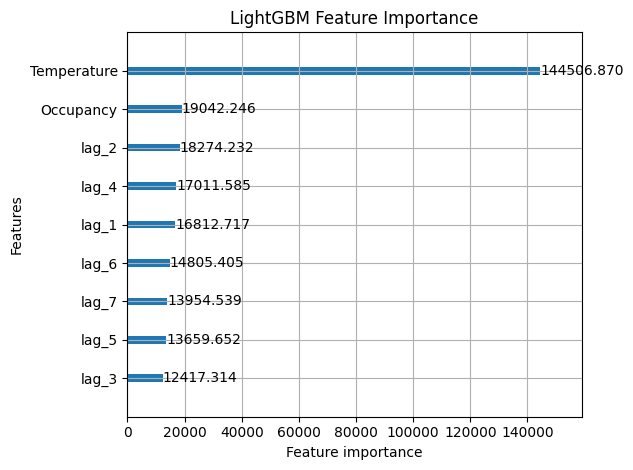

In [12]:
import matplotlib.pyplot as plt
import lightgbm as lgb

lgb.plot_importance(model, importance_type='gain', max_num_features=10)
plt.title("LightGBM Feature Importance")
plt.tight_layout()
plt.show()